# METAL : desing JPA

In [36]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '5mm'
design.chips.main.size['size_y'] = '2.5mm'


gui = MetalGUI(design)

In [38]:
design.overwrite_enabled = True
design.delete_all_components()

In [39]:
from qiskit_metal.qlibrary.lumped.cap_n_interdigital import CapNInterdigital

Cap= CapNInterdigital(design, 'Cap', options= dict(south_width='10um',south_gap='6um',  
                                                   cap_gap_ground='6um',cap_width='1.3513um', 
                                                   cap_gap='0.8108um', chip='main',
                                                   cap_distance='566um',
                                                   pos_x='-0.833333mm', pos_y='0mm', orientation='270', 
                                                   finger_length = '40um', trace_width='1um'))

gui.rebuild()


In [40]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
p1 = LaunchpadWirebond(design, 'P1', options = dict(pos_x='2250um', pos_y='0um', orientation='180', lead_length='0um',chip='main'))
p2 = LaunchpadWirebond(design, 'P2', options = dict(pos_x='-2250um', pos_y='0um', orientation='0', lead_length='241.2um',chip='main'))

gui.rebuild()


In [41]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
otg_1 = OpenToGround(design, 'open_to_ground_1', options=dict(pos_x='1.11635220mm',  pos_y='0um', orientation='0', termination_gap='4.2um'))
stg_r = ShortToGround(design, 'short_to_ground_r', options=dict(pos_x='-0.833333mm',  pos_y='0um', orientation='180'))



In [33]:
#SKIP
options = Dict(pin_inputs=Dict(start_pin=Dict(
                                            component='open_to_ground_1',
                                            pin='open'),
                                        end_pin=Dict(
                                            component='short_to_ground_r',
                                            pin='short')
                                        ),
                      total_length='4.18mm',
                      fillet='99.99um')

rt_meander=RouteMeander(design, 'rt_meander', options=options)

gui.rebuild()
gui.autoscale()


In [18]:
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

In [42]:

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from collections import OrderedDict




jogs = OrderedDict()
jogs[0] = ["L", '585um']
jogs[1] = ["R", '220um']
jogs[2] = ["R", '886um']
jogs[3] = ["L", '220um']
jogs[4] = ["L", '886um']
jogs[5] = ["R", '220um']
jogs[6] = ["R", '229um']


options = Dict(
    total_length= '4.2mm',
    fillet='99um',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'open_to_ground_1',
            pin= 'open'),
        end_pin=Dict(
            component= 'short_to_ground_r',
            pin= 'short')),
    lead=Dict(
        start_straight='663.5um',
        end_straight='346um',
        start_jogged_extension=jogs)
   )

rt_meander=RouteMeander(design, 'rt_meander', options=options)


gui.rebuild()
gui.autoscale()


In [43]:
stg_p = ShortToGround(design, 'short_to_ground_p', options=dict(pos_x='1.140mm',  pos_y='140um', 
                                                              orientation='90'))
gui.rebuild()

In [44]:

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '300um']
jogs[1] = ["R", '297um']
jogs[2] = ["R", '400um']


options = Dict(
    total_length= '1.352mm',
    fillet='99um',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'P1',
            pin= 'tie'),
        end_pin=Dict(
            component= 'short_to_ground_p',
            pin= 'short')),
    lead=Dict(
        start_straight='0.813mm',
        end_straight='0mm',
        start_jogged_extension=jogs)
   )

pumpline = RouteMeander(design,'pumpline', options=options)
gui.rebuild()
gui.autoscale()

06:24PM 50s INFO [connect_meandered]: Zero meanders for pumpline
06:24PM 50s INFO [connect_meandered]: Zero meanders for pumpline


In [45]:
from qiskit_metal import draw, Dict
from qiskit_metal.qlibrary.core.base import QComponent
import numpy as np
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

In [46]:
from qiskit_metal.qlibrary.qubits.SQUID_loop import SQUID_LOOP

In [47]:
SQUID_LOOP.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'plate1_width': '5.5um',
 'plate1_height': '40um',
 'plate1_pos_x': '0',
 'plate1_pos_y': '0',
 'squid_gap': '10um',
 'segment_a_length': '10um',
 'segment_a_width': '1um',
 'JJ_gap': '0.5um',
 'segment_b_length': '5um',
 'segment_b_width': '1um',
 'segment_c_width': '1um',
 'segment_d_length': '10um',
 'segment_d_width': '2um',
 'plate2_width': '6um',
 'plate2_height': '30um'}

In [48]:
squid = SQUID_LOOP(design, 'squid', options=dict(JJ_gap='0um',
                                                 plate1_height='4.2um',
                                                 plate1_width='0.05um',
                                                 segment_a_width='0.05um',
                                                 segment_a_length='1.15um',
                                                 segment_b_width='0.05um',
                                                 segment_b_length='1.15um',
                                                 segment_c_width='0.05um',                                                                                               segment_d_width='0um',
                                                 segment_d_length='0um',
                                                 plate2_height='0um',                                            
                                                 squid_gap='4.1um', 
                                                 orientation='90',
                                                 pos_x='1.1184522mm',
                                                 pos_y='-0.0012mm',
                                                 chip='main'
                                                 
                                             ))
gui.rebuild()

06:25PM 00s INFO [connect_meandered]: Zero meanders for pumpline


# Render in to HFSS

In [52]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res = EPRanalysis(design, "hfss")

In [53]:
hfss = eig_res.sim.renderer

In [54]:
hfss.open_ansys(path_var='ANSYSEM_ROOT211')

In [55]:
hfss.connect_ansys()

INFO 06:26PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:26PM [load_ansys_project]: 	Opened Ansys App
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   Project2
INFO 06:26PM [connect_design]: No active design found (or error getting active design).
INFO 06:26PM [connect]: 	 Connected to project "Project2". No design detected


In [56]:
hfss.activate_ansys_design("JPA_METAL", 'eigenmode')

06:26PM 14s WARNING [activate_ansys_design]: The design_name=JPA_METAL was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 06:26PM [connect_design]: 	Opened active design
	Design:    JPA_METAL [Solution type: Eigenmode]
WARNING 06:26PM [connect_setup]: 	No design setup detected.
WARNING 06:26PM [connect_setup]: 	Creating eigenmode default setup.
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


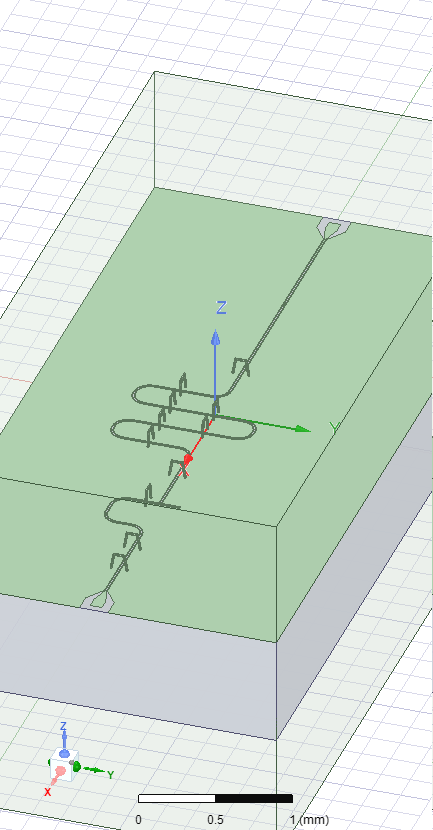

WindowsPath('C:/Users/Airplane/JupyterProject/ansys.png')

In [59]:
##TEST for 'main'
hfss.render_design(['short_to_ground_r', 'rt_meander', 'short_to_ground_p','P1', 
                    'P2','Cap','open_to_ground_1','pumpline', 'squid'],[],box_plus_buffer=False)
hfss.save_screenshot()

In [60]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
setup.n_modes = 3
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')



Number of eigenmodes to find             = 3
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



'Cj'

In [61]:
eig_res.sim.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


# get the Eigenmode, Eigenfrequency,Field Solution

In [62]:
hfss.start()

INFO 06:31PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:31PM [load_ansys_project]: 	Opened Ansys App
INFO 06:31PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:31PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   JPA_METAL_2
INFO 06:31PM [connect_design]: 	Opened active design
	Design:    JPA_METAL [Solution type: Eigenmode]
INFO 06:31PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:31PM [connect]: 	Connected to project "JPA_METAL_2" and design "JPA_METAL" 😀 



True

In [63]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()


06:31PM 47s INFO [get_f_convergence]: Saved convergences to C:\Users\Airplane\JupyterProject\hfss_eig_f_convergence.csv
INFO 06:31PM [__del__]: Disconnected from Ansys HFSS


06:34PM 03s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


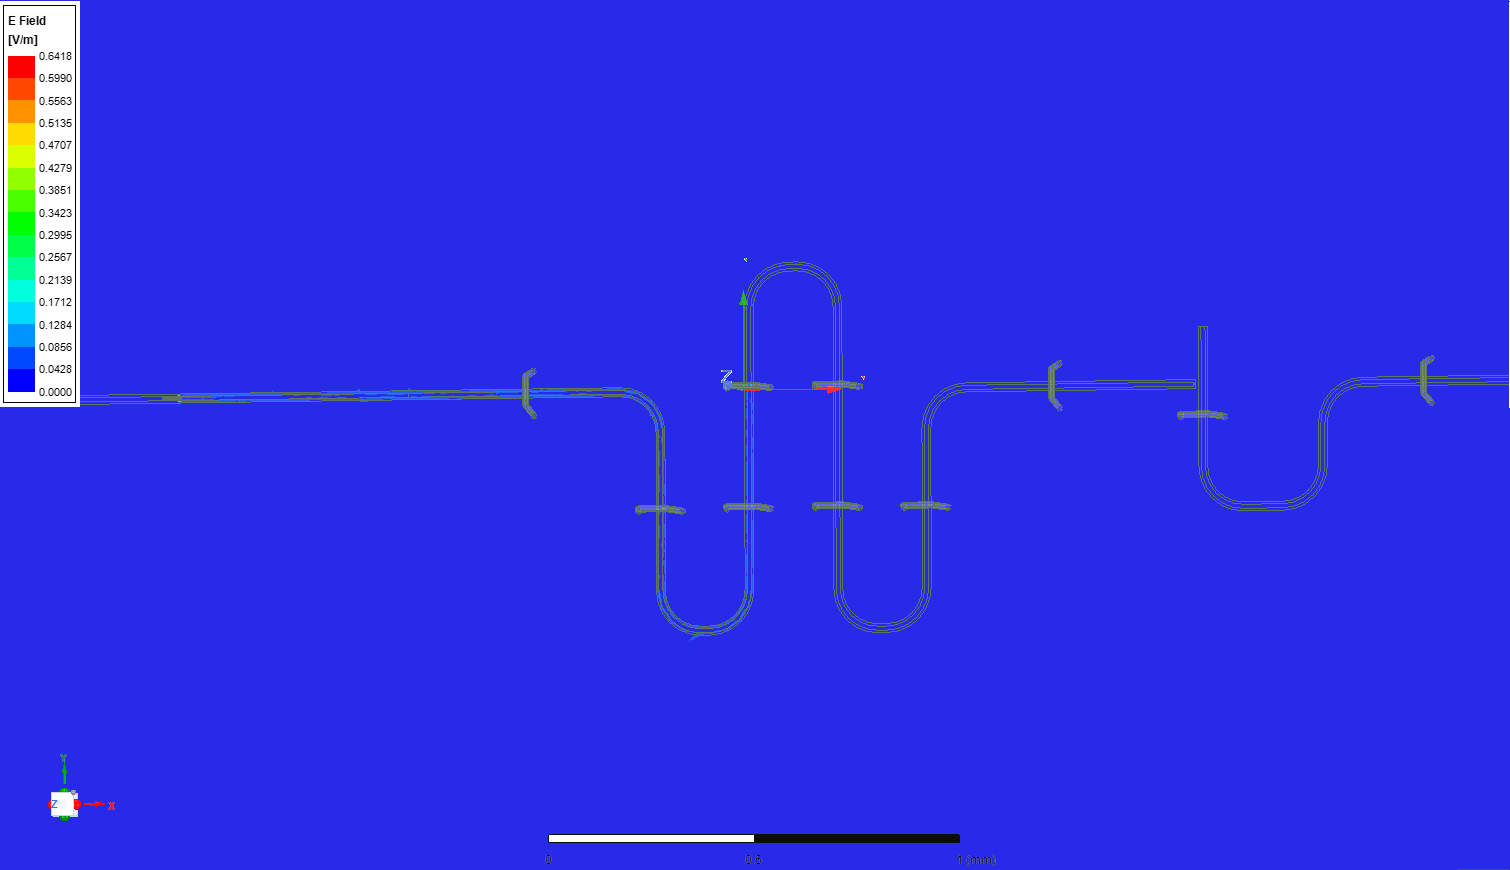

WindowsPath('C:/Users/Airplane/JupyterProject/ansys.png')

In [65]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [13]:
hfss.clear_fields(['Mag_E1'])

In [14]:
hfss.set_mode(2, "Setup")

INFO 06:15PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


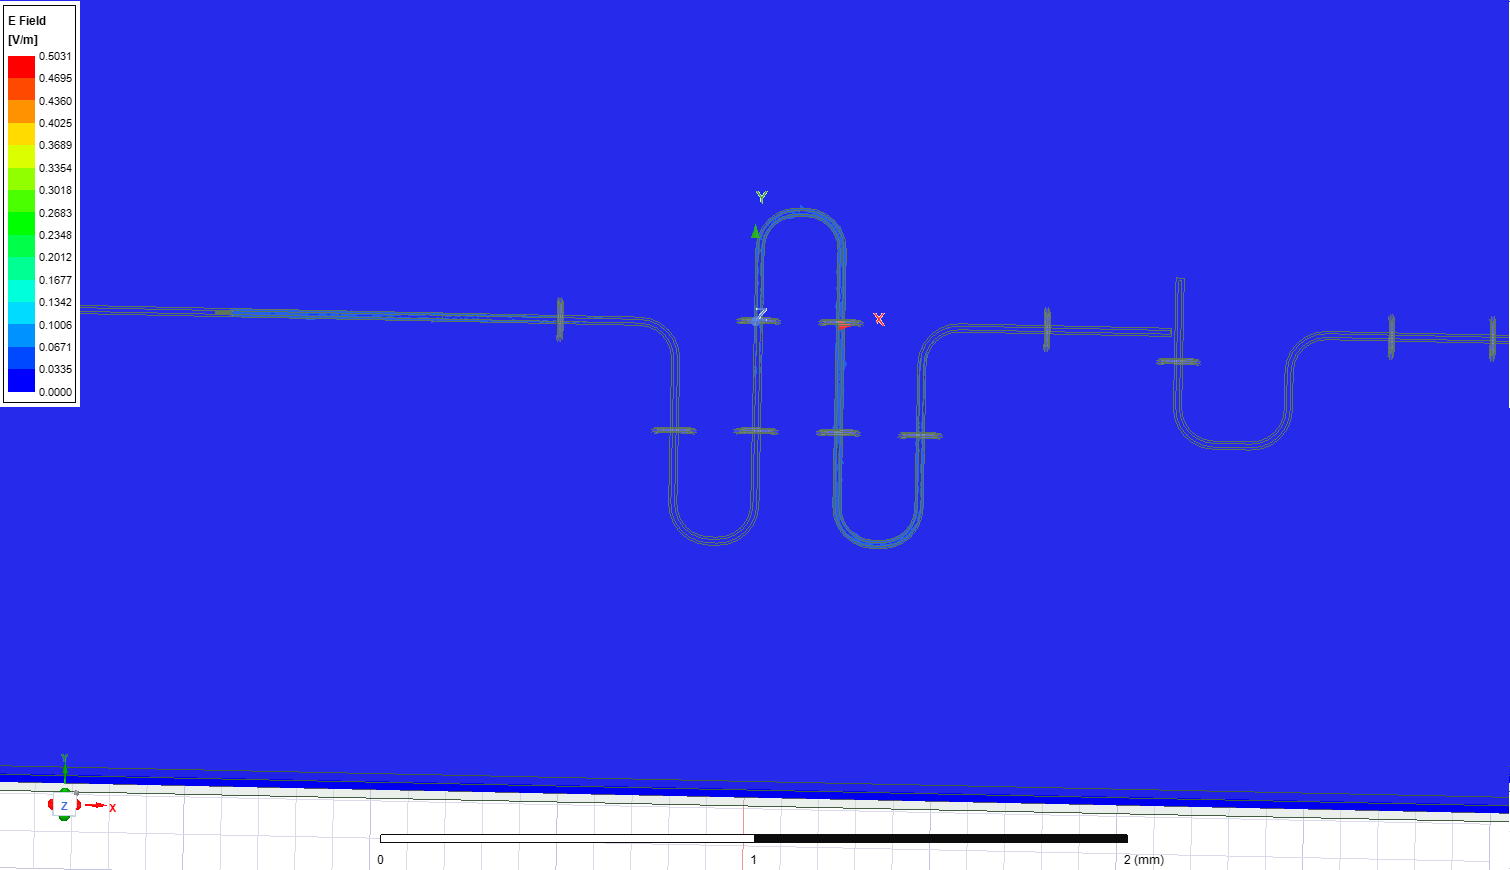

WindowsPath('C:/Users/Airplane/JupyterProject/ansys.png')

In [15]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [66]:
hfss.clear_fields(['Mag_E1'])

In [67]:
hfss.disconnect_ansys() 

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


# Capacitance 

In [69]:
from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
c1 = LOManalysis(design, "q3d")

In [70]:
c1.sim.setup['freq_ghz']= '5.59311Ghz'

In [82]:
q3d=c1.sim.renderer

In [83]:
q3d.connect_ansys()

INFO 07:00PM [connect_project]: Connecting to Ansys Desktop API...
INFO 07:00PM [load_ansys_project]: 	Opened Ansys App
INFO 07:00PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 07:00PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Airplane/OneDrive - skku.edu/문서/Ansoft/
	Project:   JPA_METAL_2
INFO 07:00PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 07:00PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:00PM [connect]: 	Connected to project "JPA_METAL_2" and design "Design_q3d" 😀 



In [84]:
c1.sim._get_results_from_renderer()
c1.sim.capacitance_matrix

INFO 07:00PM [get_matrix]: Exporting matrix data to (C:\Users\Airplane\AppData\Local\Temp\tmp3_6jy54e.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5593110000, Maxwell, 1, False
INFO 07:00PM [get_matrix]: Exporting matrix data to (C:\Users\Airplane\AppData\Local\Temp\tmplh91muf9.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5593110000, Maxwell, 1, False
INFO 07:00PM [get_matrix]: Exporting matrix data to (C:\Users\Airplane\AppData\Local\Temp\tmpjefi8i7m.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5593110000, Maxwell, 2, False
INFO 07:00PM [get_matrix]: Exporting matrix data to (C:\Users\Airplane\AppData\Local\Temp\tmpb6klu0c6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5593110000, Maxwell, 3, False
INFO 07:00PM [get_matrix]: Exporting matrix data to (C:\Users\Airplane\AppData\Local\Temp\tmpn2o1902s.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5593110000, Maxwell, 4, F

,resonator,signalport
resonator,859.82700,-10.55997
signalport,-10.55997,189.71502


In [85]:
c1.sim.close()

Warning! 12 COM references still alive
Ansys will likely refuse to shut down
